This dataset simulates anonymized journaling entries from users of a mental health journaling app.
Each row represents one journal entry with text and derived features (sentiment, emotions, etc.).
The goal is to detect early signs of mental health deterioration and classify users into risk categories.

Column Descriptions

entry_id → Unique identifier for each journal entry (UUID).

user_id → Anonymized user ID (helps track multiple entries from same user).

timestamp → Date and time when the entry was written.

journal_text → The raw journaling text written by the user (main NLP input).

sentiment_score → Numeric score from -1 (negative) to +1 (positive), representing overall sentiment.

emotion_scores → Dictionary of detected emotions with intensity values (e.g., {sadness: 0.7, anxiety: 0.4}).

word_count → Number of words in the entry (can show engagement level).

topic_category → The main topic of the entry (e.g., work, relationships, health, loneliness).

time_of_day → Time period when entry was written (morning, afternoon, evening, night).

keyword_flags → Whether sensitive keywords appear (e.g., “depressed”, “anxious”, “hopeless”).

entry_frequency → Number of entries the user made per week (reflects journaling behavior).

mental_health_label → Target column – the mental health state of the user.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [41]:
df = pd.read_csv("ML8_mental_health_journaling_data.csv")

In [42]:
df.head()

,entry_id,user_id,timestamp,journal_text,sentiment_score,emotion_scores,word_count,topic_category,time_of_day,keyword_flags,entry_frequency,mental_health_label
0,21690328-c015-45b5-bf61-4006ce82b534,23eb4e56-b0ce-436e-bad2-f07bfe9a2b6c,2025-03-08 15:54:38,Deep notice know boy about capital black kid q...,-0.69,{'disgust': 0.36},17,loneliness,night,hopeless,6,severe distress
1,7a25a35e-9f58-44e2-bed0-abc37e2f9391,be5630e4-9ad0-45fa-ab50-632bc7f8fe97,2025-04-22 16:23:06,Prepare personal age grow recently make should...,0.20,{'anxiety': 0.32},26,personal growth,evening,anxious,1,mild distress
2,ea066ed0-9e94-477d-9b0b-3e4a4dfa05f5,5dde8270-397f-4635-bd97-22bf975dc377,2025-03-29 09:24:53,Hot somebody account provide time huge article...,-0.04,"{'sadness': 0.07, 'fear': 0.71}",16,loneliness,afternoon,depressed,7,mild distress
3,2d91f591-a704-4e88-b094-ebdb9822c27d,3b891fc4-d644-48da-863c-22916202ec66,2025-02-26 15:23:12,Answer far ask member market ok these college ...,-0.68,{'joy': 0.08},20,finances,morning,depressed,5,stable
4,1f259ef9-b245-4b9d-ac2c-2320f51b0080,886105da-88dd-4702-948d-e5d6db0382cb,2025-05-25 22:56:12,Fast necessary article keep go audience bag co...,0.76,"{'anxiety': 0.0, 'surprise': 0.57, 'sadness': ...",19,work,evening,hopeless,5,mild distress


In [43]:
df.tail()

,entry_id,user_id,timestamp,journal_text,sentiment_score,emotion_scores,word_count,topic_category,time_of_day,keyword_flags,entry_frequency,mental_health_label
9995,6abef917-3f36-4ee2-bbd8-3582d85b8499,02a57ac4-fb37-45c4-a8ae-7947e33df89b,2025-03-15 07:33:15,Himself director pull why see vote start quite...,0.12,"{'anxiety': 0.38, 'surprise': 0.69, 'disgust':...",21,loneliness,evening,hopeless,4,severe distress
9996,b99615ca-440c-419f-ad05-f3e5086b3a86,964c7a0a-7f33-4193-982e-02aa341dfc44,2025-05-29 16:01:07,It phone receive suggest green history while t...,-0.54,"{'sadness': 0.94, 'fear': 0.85}",12,family,evening,anxious,6,stable
9997,0208775d-6198-49f3-8cfd-eb52ac03db4f,2484746e-e0cd-4187-90d7-b3937802f1ff,2025-05-18 22:26:21,Analysis southern character compare career eas...,0.54,"{'anxiety': 0.84, 'anger': 0.89}",26,health,night,hopeless,1,mild distress
9998,037f3de4-c195-4436-a4c6-c1246c29c01a,c4fe676b-c1a1-451b-aaae-cb6ed01050e6,2025-06-09 01:26:17,Discussion society senior approach story set w...,-0.36,"{'anger': 0.51, 'disgust': 0.23}",16,health,morning,none,3,mild distress
9999,2cb67419-c993-4117-8cc4-7d2d082e565f,c79379d8-5690-48db-ba21-dca842b443d5,2025-08-12 21:09:11,That space while under when fire increase quic...,0.88,{'joy': 0.89},15,work,night,depressed,7,stable


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entry_id             10000 non-null  object 
 1   user_id              10000 non-null  object 
 2   timestamp            10000 non-null  object 
 3   journal_text         10000 non-null  object 
 4   sentiment_score      10000 non-null  float64
 5   emotion_scores       10000 non-null  object 
 6   word_count           10000 non-null  int64  
 7   topic_category       10000 non-null  object 
 8   time_of_day          10000 non-null  object 
 9   keyword_flags        10000 non-null  object 
 10  entry_frequency      10000 non-null  int64  
 11  mental_health_label  10000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 937.6+ KB


In [45]:
df.columns

Index(['entry_id', 'user_id', 'timestamp', 'journal_text', 'sentiment_score',
       'emotion_scores', 'word_count', 'topic_category', 'time_of_day',
       'keyword_flags', 'entry_frequency', 'mental_health_label'],
      dtype='object')

In [46]:
df.dtypes

entry_id                object
user_id                 object
timestamp               object
journal_text            object
sentiment_score        float64
emotion_scores          object
word_count               int64
topic_category          object
time_of_day             object
keyword_flags           object
entry_frequency          int64
mental_health_label     object
dtype: object

In [47]:
df.describe

<bound method NDFrame.describe of                                   entry_id  \
0     21690328-c015-45b5-bf61-4006ce82b534   
1     7a25a35e-9f58-44e2-bed0-abc37e2f9391   
2     ea066ed0-9e94-477d-9b0b-3e4a4dfa05f5   
3     2d91f591-a704-4e88-b094-ebdb9822c27d   
4     1f259ef9-b245-4b9d-ac2c-2320f51b0080   
...                                    ...   
9995  6abef917-3f36-4ee2-bbd8-3582d85b8499   
9996  b99615ca-440c-419f-ad05-f3e5086b3a86   
9997  0208775d-6198-49f3-8cfd-eb52ac03db4f   
9998  037f3de4-c195-4436-a4c6-c1246c29c01a   
9999  2cb67419-c993-4117-8cc4-7d2d082e565f   

                                   user_id            timestamp  \
0     23eb4e56-b0ce-436e-bad2-f07bfe9a2b6c  2025-03-08 15:54:38   
1     be5630e4-9ad0-45fa-ab50-632bc7f8fe97  2025-04-22 16:23:06   
2     5dde8270-397f-4635-bd97-22bf975dc377  2025-03-29 09:24:53   
3     3b891fc4-d644-48da-863c-22916202ec66  2025-02-26 15:23:12   
4     886105da-88dd-4702-948d-e5d6db0382cb  2025-05-25 22:56:12   
...        

In [48]:
df.shape

(10000, 12)

In [49]:
numerical_value = df.select_dtypes(exclude="object")

In [50]:
df[df.dtypes[df.dtypes == 'object' ].index]

,entry_id,user_id,timestamp,journal_text,emotion_scores,topic_category,time_of_day,keyword_flags,mental_health_label
0,21690328-c015-45b5-bf61-4006ce82b534,23eb4e56-b0ce-436e-bad2-f07bfe9a2b6c,2025-03-08 15:54:38,Deep notice know boy about capital black kid q...,{'disgust': 0.36},loneliness,night,hopeless,severe distress
1,7a25a35e-9f58-44e2-bed0-abc37e2f9391,be5630e4-9ad0-45fa-ab50-632bc7f8fe97,2025-04-22 16:23:06,Prepare personal age grow recently make should...,{'anxiety': 0.32},personal growth,evening,anxious,mild distress
2,ea066ed0-9e94-477d-9b0b-3e4a4dfa05f5,5dde8270-397f-4635-bd97-22bf975dc377,2025-03-29 09:24:53,Hot somebody account provide time huge article...,"{'sadness': 0.07, 'fear': 0.71}",loneliness,afternoon,depressed,mild distress
3,2d91f591-a704-4e88-b094-ebdb9822c27d,3b891fc4-d644-48da-863c-22916202ec66,2025-02-26 15:23:12,Answer far ask member market ok these college ...,{'joy': 0.08},finances,morning,depressed,stable
4,1f259ef9-b245-4b9d-ac2c-2320f51b0080,886105da-88dd-4702-948d-e5d6db0382cb,2025-05-25 22:56:12,Fast necessary article keep go audience bag co...,"{'anxiety': 0.0, 'surprise': 0.57, 'sadness': ...",work,evening,hopeless,mild distress
...,...,...,...,...,...,...,...,...,...
9995,6abef917-3f36-4ee2-bbd8-3582d85b8499,02a57ac4-fb37-45c4-a8ae-7947e33df89b,2025-03-15 07:33:15,Himself director pull why see vote start quite...,"{'anxiety': 0.38, 'surprise': 0.69, 'disgust':...",loneliness,evening,hopeless,severe distress
9996,b99615ca-440c-419f-ad05-f3e5086b3a86,964c7a0a-7f33-4193-982e-02aa341dfc44,2025-05-29 16:01:07,It phone receive suggest green history while t...,"{'sadness': 0.94, 'fear': 0.85}",family,evening,anxious,stable
9997,0208775d-6198-49f3-8cfd-eb52ac03db4f,2484746e-e0cd-4187-90d7-b3937802f1ff,2025-05-18 22:26:21,Analysis southern character compare career eas...,"{'anxiety': 0.84, 'anger': 0.89}",health,night,hopeless,mild distress
9998,037f3de4-c195-4436-a4c6-c1246c29c01a,c4fe676b-c1a1-451b-aaae-cb6ed01050e6,2025-06-09 01:26:17,Discussion society senior approach story set w...,"{'anger': 0.51, 'disgust': 0.23}",health,morning,none,mild distress


In [51]:
df[df.dtypes[df.dtypes == 'object' ].index]

,entry_id,user_id,timestamp,journal_text,emotion_scores,topic_category,time_of_day,keyword_flags,mental_health_label
0,21690328-c015-45b5-bf61-4006ce82b534,23eb4e56-b0ce-436e-bad2-f07bfe9a2b6c,2025-03-08 15:54:38,Deep notice know boy about capital black kid q...,{'disgust': 0.36},loneliness,night,hopeless,severe distress
1,7a25a35e-9f58-44e2-bed0-abc37e2f9391,be5630e4-9ad0-45fa-ab50-632bc7f8fe97,2025-04-22 16:23:06,Prepare personal age grow recently make should...,{'anxiety': 0.32},personal growth,evening,anxious,mild distress
2,ea066ed0-9e94-477d-9b0b-3e4a4dfa05f5,5dde8270-397f-4635-bd97-22bf975dc377,2025-03-29 09:24:53,Hot somebody account provide time huge article...,"{'sadness': 0.07, 'fear': 0.71}",loneliness,afternoon,depressed,mild distress
3,2d91f591-a704-4e88-b094-ebdb9822c27d,3b891fc4-d644-48da-863c-22916202ec66,2025-02-26 15:23:12,Answer far ask member market ok these college ...,{'joy': 0.08},finances,morning,depressed,stable
4,1f259ef9-b245-4b9d-ac2c-2320f51b0080,886105da-88dd-4702-948d-e5d6db0382cb,2025-05-25 22:56:12,Fast necessary article keep go audience bag co...,"{'anxiety': 0.0, 'surprise': 0.57, 'sadness': ...",work,evening,hopeless,mild distress
...,...,...,...,...,...,...,...,...,...
9995,6abef917-3f36-4ee2-bbd8-3582d85b8499,02a57ac4-fb37-45c4-a8ae-7947e33df89b,2025-03-15 07:33:15,Himself director pull why see vote start quite...,"{'anxiety': 0.38, 'surprise': 0.69, 'disgust':...",loneliness,evening,hopeless,severe distress
9996,b99615ca-440c-419f-ad05-f3e5086b3a86,964c7a0a-7f33-4193-982e-02aa341dfc44,2025-05-29 16:01:07,It phone receive suggest green history while t...,"{'sadness': 0.94, 'fear': 0.85}",family,evening,anxious,stable
9997,0208775d-6198-49f3-8cfd-eb52ac03db4f,2484746e-e0cd-4187-90d7-b3937802f1ff,2025-05-18 22:26:21,Analysis southern character compare career eas...,"{'anxiety': 0.84, 'anger': 0.89}",health,night,hopeless,mild distress
9998,037f3de4-c195-4436-a4c6-c1246c29c01a,c4fe676b-c1a1-451b-aaae-cb6ed01050e6,2025-06-09 01:26:17,Discussion society senior approach story set w...,"{'anger': 0.51, 'disgust': 0.23}",health,morning,none,mild distress


In [52]:
df.dtypes=='int'

entry_id               False
user_id                False
timestamp              False
journal_text           False
sentiment_score        False
emotion_scores         False
word_count              True
topic_category         False
time_of_day            False
keyword_flags          False
entry_frequency         True
mental_health_label    False
dtype: bool

In [53]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers
numeric_columns = ['sentiment_score', 'word_count', 'entry_frequency']
for col in numeric_columns:
    detect_outliers(df, col)

sentiment_score: 0 outliers
word_count: 0 outliers
entry_frequency: 0 outliers


<Axes: xlabel='sentiment_score'>

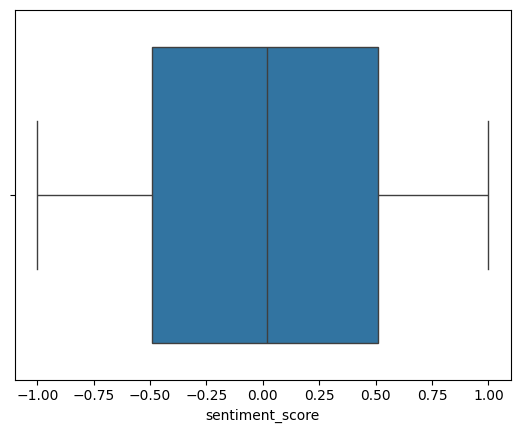

In [54]:
sns.boxplot(x="sentiment_score",data=df)

<Axes: xlabel='word_count'>

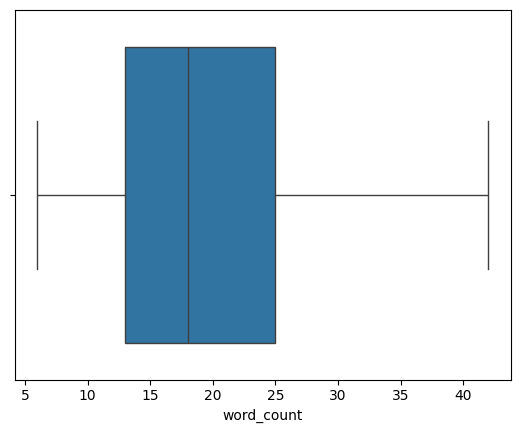

In [55]:
sns.boxplot(x="word_count",data=df)

<Axes: xlabel='entry_frequency'>

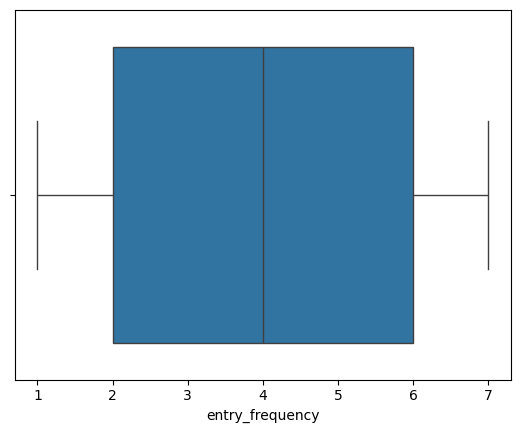

In [56]:
sns.boxplot(x="entry_frequency",data=df)

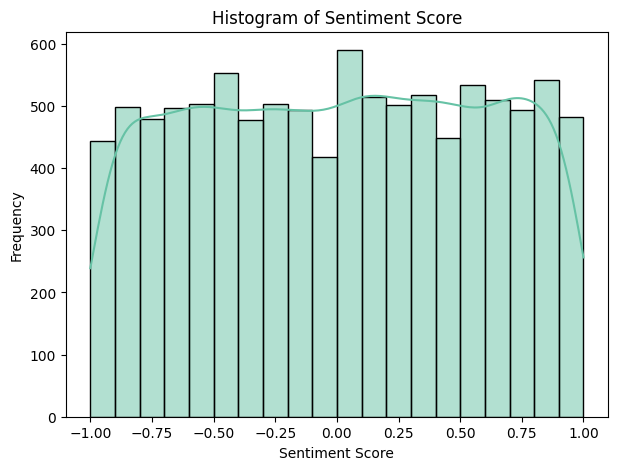

In [57]:
plt.figure(figsize=(7,5))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color=sns.color_palette("Set2")[0])
plt.title("Histogram of Sentiment Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

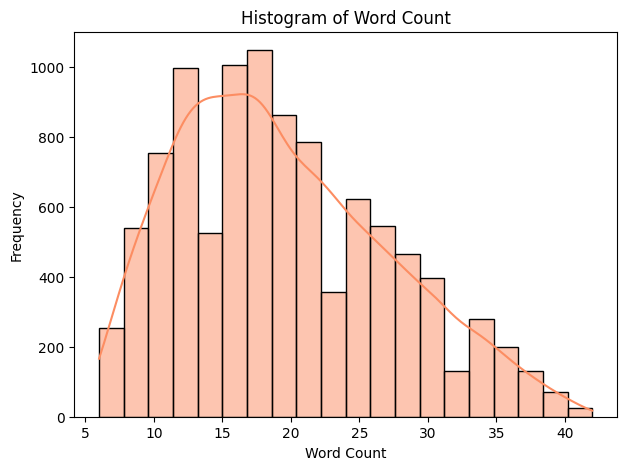

In [58]:
plt.figure(figsize=(7,5))
sns.histplot(df['word_count'], bins=20, kde=True, color=sns.color_palette("Set2")[1])
plt.title("Histogram of Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

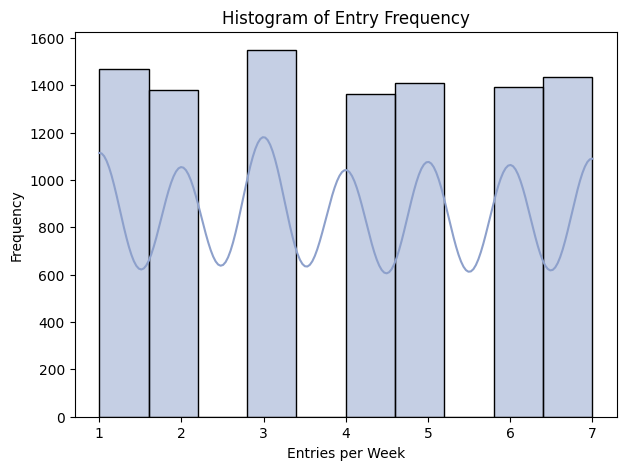

In [59]:
plt.figure(figsize=(7,5))
sns.histplot(df['entry_frequency'], bins=10, kde=True, color=sns.color_palette("Set2")[2])
plt.title("Histogram of Entry Frequency")
plt.xlabel("Entries per Week")
plt.ylabel("Frequency")
plt.show()

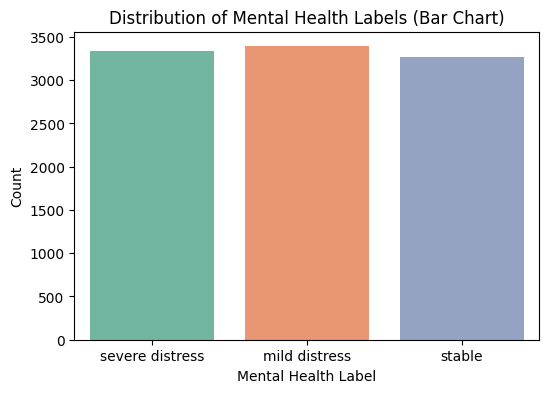

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(x='mental_health_label', data=df, hue='mental_health_label', palette="Set2", legend=False)
plt.title("Distribution of Mental Health Labels (Bar Chart)")
plt.xlabel("Mental Health Label")
plt.ylabel("Count")
plt.show()

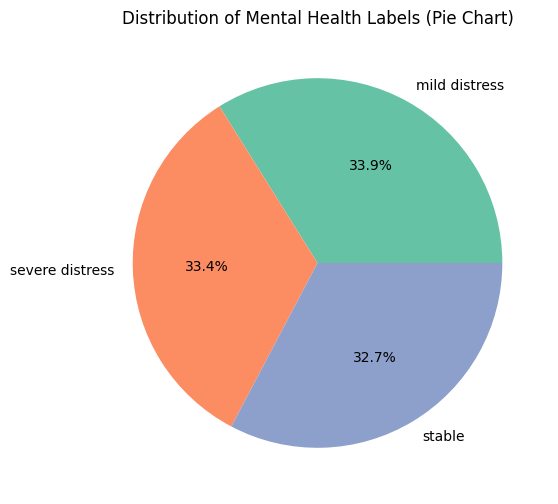

In [61]:
plt.figure(figsize=(6,6))
df['mental_health_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Distribution of Mental Health Labels (Pie Chart)")
plt.ylabel("")
plt.show()

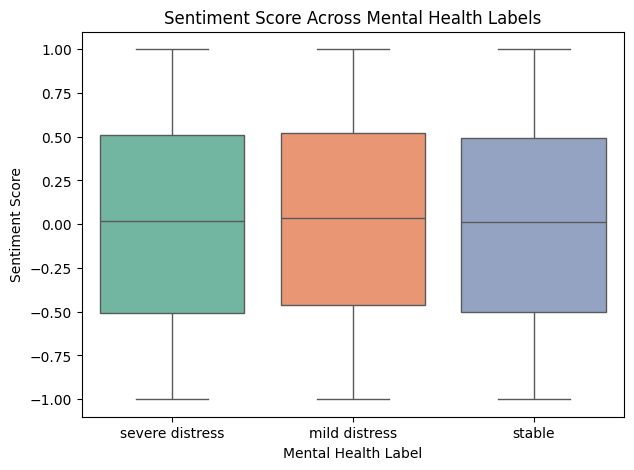

In [62]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x='mental_health_label', 
    y='sentiment_score', 
    data=df, 
    hue='mental_health_label', 
    palette="Set2", 
    legend=False
)
plt.title("Sentiment Score Across Mental Health Labels")
plt.xlabel("Mental Health Label")
plt.ylabel("Sentiment Score")
plt.show()

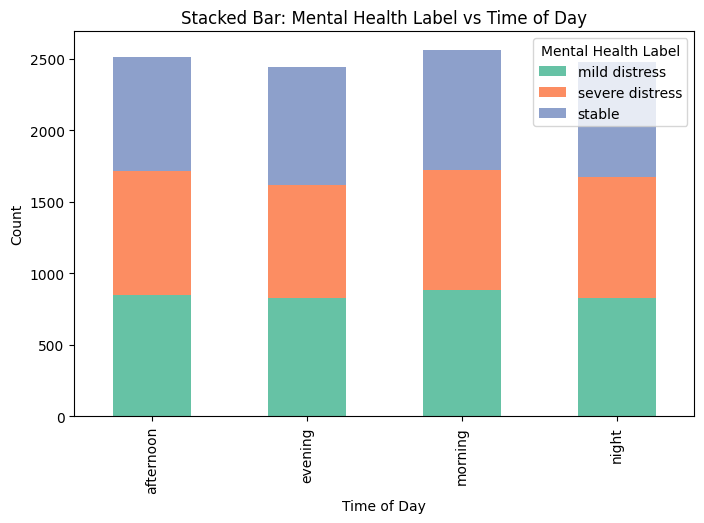

In [63]:
cross_tab = pd.crosstab(df['time_of_day'], df['mental_health_label'])

cross_tab.plot(kind="bar", stacked=True, figsize=(8,5), color=sns.color_palette("Set2"))
plt.title("Stacked Bar: Mental Health Label vs Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.legend(title="Mental Health Label")
plt.show()

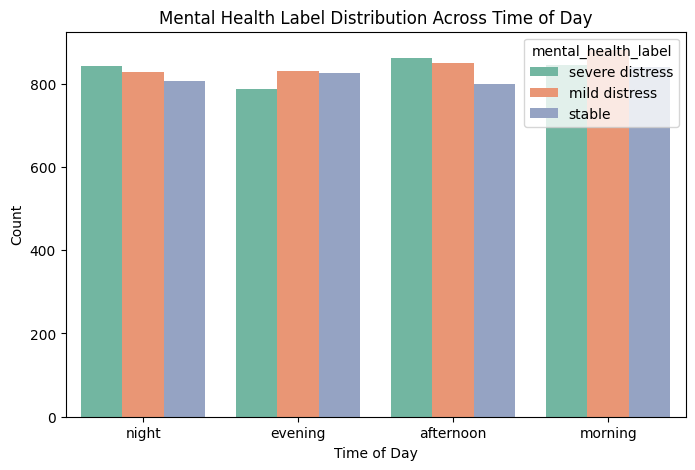

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x='time_of_day', hue='mental_health_label', data=df, palette="Set2")
plt.title("Mental Health Label Distribution Across Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.show()

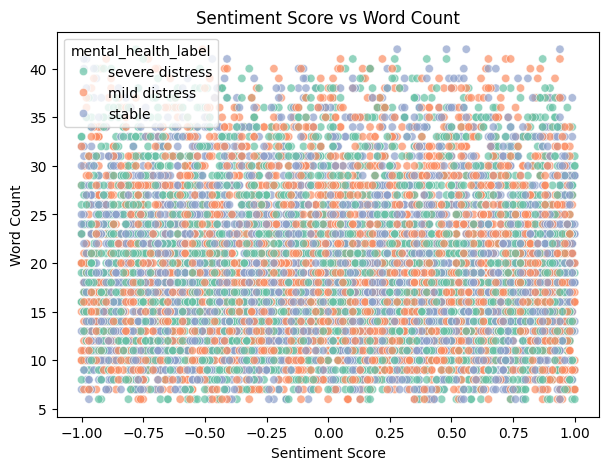

In [65]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='sentiment_score', y='word_count', data=df, hue='mental_health_label', palette="Set2", alpha=0.7)
plt.title("Sentiment Score vs Word Count")
plt.xlabel("Sentiment Score")
plt.ylabel("Word Count")
plt.show()

In [66]:
num = df.select_dtypes(include='number')

In [67]:
correlation = num.corr()

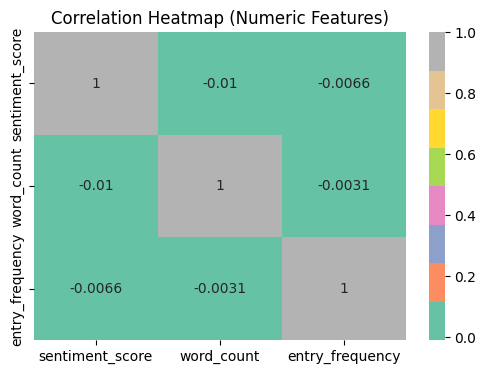

In [68]:
plt.figure(figsize=(6,4))
numeric_cols = ['sentiment_score','word_count','entry_frequency']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Set2")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [69]:
dataset=pd.get_dummies(df,dtype=int,drop_first=True) 
dataset

,sentiment_score,word_count,entry_frequency,entry_id_0009a613-5ecd-4af0-ac7f-4820c029035b,entry_id_000f004e-1ab4-4a62-b950-936c09cd9925,entry_id_0011f893-ea62-4afa-9ba9-0b912a8301e0,entry_id_0014bd4d-a7ed-4023-aa7f-09e668590aaa,entry_id_00193515-5127-4493-9df1-4f10c55bd041,entry_id_001c0673-87da-4b58-818a-49b8788c5dea,entry_id_001d827b-4ae5-4d64-a4aa-b3b280b5d491,...,topic_category_work,time_of_day_evening,time_of_day_morning,time_of_day_night,keyword_flags_depressed,keyword_flags_hopeless,keyword_flags_none,keyword_flags_stressed,mental_health_label_severe distress,mental_health_label_stable
0,-0.69,17,6,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0.20,26,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.04,16,7,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.68,20,5,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0.76,19,5,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.12,21,4,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
9996,-0.54,12,6,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9997,0.54,26,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9998,-0.36,16,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 47332 entries, sentiment_score to mental_health_label_stable
dtypes: float64(1), int64(47331)
memory usage: 3.5 GB


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 47332 entries, sentiment_score to mental_health_label_stable
dtypes: float64(1), int64(47331)
memory usage: 3.5 GB


In [72]:
df=pd.read_csv("ML8_mental_health_journaling_data.csv")

In [73]:
X = df[['sentiment_score']]   # only one column
y = df['mental_health_label']

In [74]:
le = LabelEncoder()
y = le.fit_transform(y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [76]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train) 

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [77]:
y_pred = clf.predict(X_test)

In [79]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.325


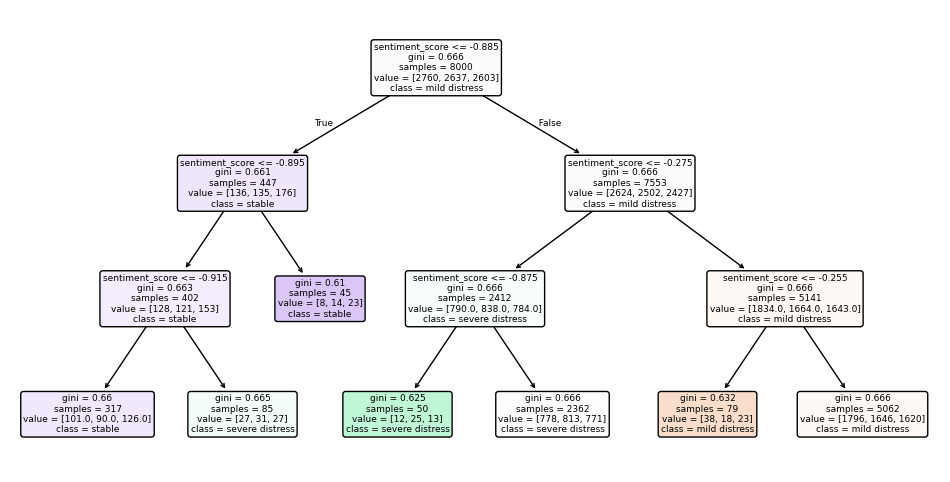

In [78]:
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=['sentiment_score'], class_names=le.classes_, filled=True, rounded=True)
plt.show()